In [1]:
%matplotlib inline

In [7]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from matplotlib import rcParams as params
from matplotlib import font_manager as font_manager    

params.update({'font.size': 25})
params.update({'font.family': 'Latin Modern Roman'})

# Basics
#from preprocessing import crop
from preprocessing import resize
from preprocessing import resize_crop

# My inception prep
#from preprocessing.inception import resize_crop as inception

# Copied from tf models repo
#from preprocessing.tf_models import vgg as tf_vgg
#from preprocessing.tf_models import inception as tf_inception

# With ImageNet mean subtraction
#from preprocessing.imagenet import crop as in_crop
from preprocessing.imagenet import resize as in_resize
#from preprocessing.imagenet import resize_crop as in_resize_crop

# With ImageNet mean subtraction and changing the color dimensions to BGR
#from preprocessing.imagenet.bgr import crop as in_bgr_crop
#from preprocessing.imagenet.bgr import resize as in_bgr_resize
#from preprocessing.imagenet.bgr import resize_crop as in_bgr_resize_crop

# Horizontal Flip Wrapper
from preprocessing.wrapper import flip_horizontal as flip_h_wrapper

In [43]:
img_size      = 480
img_path      = './images/llama.jpeg'

img_file      = tf.read_file(img_path)
img_decoded   = tf.image.decode_jpeg(img_file, channels=3)


# Basics
# img_crop        = crop.preprocess_image(img_decoded, img_size, img_size)
img_resize      = resize.preprocess_image(img_decoded, img_size, img_size)
# img_resize_crop = resize_crop.preprocess_image(img_decoded, img_size, img_size)

# With ImageNet mean subtraction
#img_in_crop        = in_crop.preprocess_image(img_decoded, img_size, img_size)
# img_in_resize      = in_resize.preprocess_image(img_decoded, img_size, img_size)
#img_in_resize_crop = in_resize_crop.preprocess_image(img_decoded, img_size, img_size)

# With ImageNet mean subtraction and changing the color dimensions to BGR
#img_in_bgr_crop        = in_bgr_crop.preprocess_image(img_decoded, img_size, img_size)
#img_in_bgr_resize      = in_bgr_resize.preprocess_image(img_decoded, img_size, img_size)
#img_in_bgr_resize_crop = in_bgr_resize_crop.preprocess_image(img_decoded, img_size, img_size)

# Tensorflow Scripts for VGG and Inception
#img_tf_vgg       = tf_vgg.preprocess_image(img_decoded, img_size, img_size)
#img_tf_inception = tf_inception.preprocess_image(img_decoded, img_size, img_size)

# My Script for inception
#img_inception = inception.preprocess_image(img_decoded, img_size, img_size)

# Horizontal Flip Wrapper
img_resize_flip = flip_h_wrapper.wrap(resize).preprocess_image(img_decoded, img_size, img_size)

In [44]:
with tf.Session() as sess:
    img = sess.run(img_decoded)
    
    #c = sess.run(img_crop)
    r = sess.run(img_resize)
    #rc = sess.run(img_resize_crop)
    rf = sess.run(img_resize_flip)
    
    #in_c = sess.run(img_in_crop)
    #in_r = sess.run(img_in_resize)
    #in_rc = sess.run(img_in_resize_crop)
    
    #in_bgr_c = sess.run(img_in_bgr_crop)
    #in_bgr_r = sess.run(img_in_bgr_resize)
    #in_bgr_rc = sess.run(img_in_bgr_resize_crop)
    
    #i = sess.run(img_inception)
    #tf_i = sess.run(img_tf_inception)
    #tf_vgg = sess.run(img_tf_vgg)
    
    #for x in range(len(i)):
    #    i[x] = i[x] * 255
    #    tf_i[x] = tf_i[x] * 255

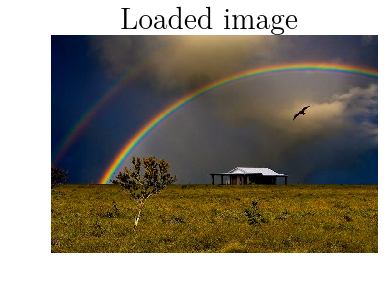

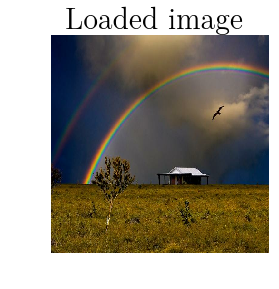

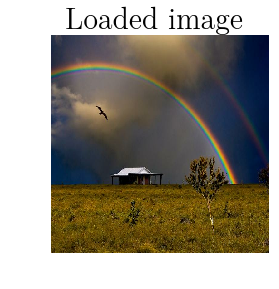

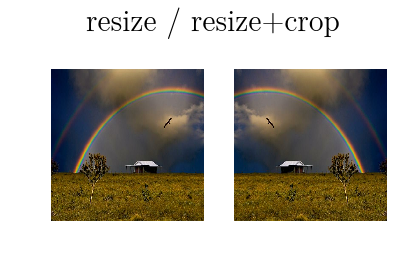

In [45]:
    plt.figure()
    plt.imshow(img.astype(np.uint8))
    plt.suptitle("Loaded image")
    plt.axis("off")
    plt.show()
    
    plt.figure()
    plt.imshow(r.astype(np.uint8))
    plt.suptitle("Loaded image")
    plt.axis("off")
    plt.show()
    
    plt.figure()
    plt.imshow(rf.astype(np.uint8))
    plt.suptitle("Loaded image")
    plt.axis("off")
    plt.show()
    
    plt.figure()
    plt.suptitle("resize / resize+crop")
    plt.subplot(121)
    plt.imshow(r.astype(np.uint8))
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(rf.astype(np.uint8))
    plt.axis("off")
    plt.show()

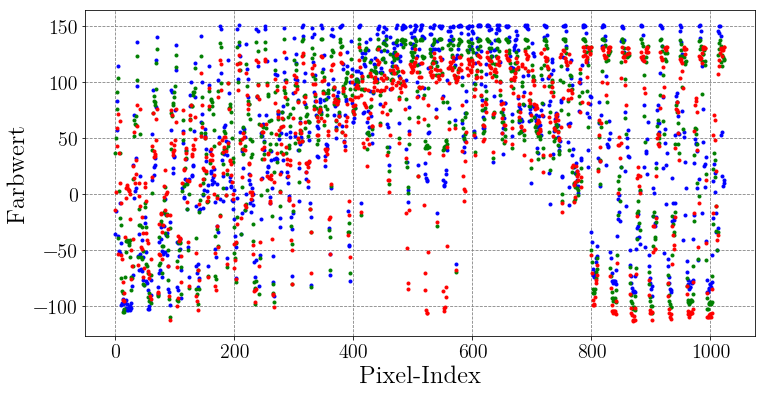

In [80]:
f = [] # r was taken :D
g = []
b = []

for x in range(img_size):
    for y in range(img_size):
        f.append(in_rc[y][x][0])
        g.append(in_rc[y][x][1])
        b.append(in_rc[y][x][2])
        
plt.figure(figsize=(12,6))
plt.plot(b, '.', color='blue')
plt.plot(g, '.', color='green')
plt.plot(f, '.', color='red')
plt.tick_params(labelsize=20)
plt.ylabel('Farbwert')
plt.xlabel('Pixel-Index')
plt.grid(axis='y', color='0.5',linestyle='--')
plt.grid(axis='x', color='0.5',linestyle='--')
plt.show()

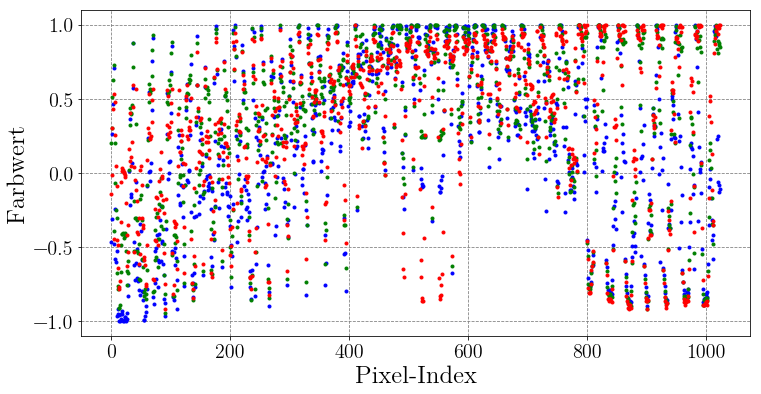

In [79]:
f = [] # r was taken :D
g = []
b = []
for x in range(img_size):
    for y in range(img_size):
        f.append(i[y][x][0])
        g.append(i[y][x][1])
        b.append(i[y][x][2])
     
plt.figure(figsize=(12,6))
plt.plot(b, '.', color='blue')
plt.plot(g, '.', color='green')
plt.plot(f, '.', color='red')
plt.tick_params(labelsize=20)
plt.ylabel('Farbwert')
plt.xlabel('Pixel-Index')
plt.grid(axis='y', color='0.5',linestyle='--')
plt.grid(axis='x', color='0.5',linestyle='--')
plt.show()